In [93]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [48]:
gaussian_blue = np.random.multivariate_normal(mean = np.array((0,0)), 
                                      cov = np.eye(2), size=100)
gaussian_red = np.random.multivariate_normal(mean = np.array((3/2,3/2)), 
                                      cov = np.eye(2), size=100)

/tmp/ipykernel_1878/3148587984.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo', marker='.', color='b')
/tmp/ipykernel_1878/3148587984.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo', marker='.', color='b')
/tmp/ipykernel_1878/3148587984.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', marker='.', color='r')
/tmp/ipykernel_1878/3148587984.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will

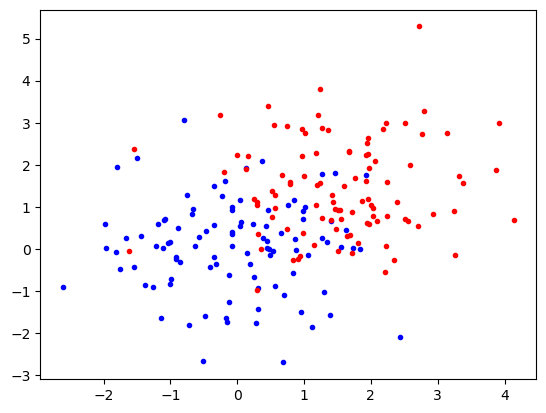

In [49]:
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo', marker='.', color='b')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', marker='.', color='r')

In [50]:
whole_data = np.vstack((gaussian_blue, gaussian_red))

In [51]:
labels = np.ones((200))*99
for i in range(20):
    labels[i] = 1

In [52]:
whole_data_df = pd.DataFrame(whole_data)

In [53]:
whole_data_df.columns = ['x1','x2']
whole_data_df['labels'] = labels

In [54]:
whole_data_df

,x1,x2,labels
0,-0.728062,-1.812862,1.0
1,-0.909575,-0.202967,1.0
2,-0.634736,0.057286,1.0
3,0.477112,-0.010788,1.0
4,0.982977,0.713569,1.0
...,...,...,...
195,0.676706,1.763239,99.0
196,2.059322,2.088054,99.0
197,1.476769,0.464411,99.0
198,0.933479,-0.175779,99.0


In [59]:
clusters = KMeans(n_clusters=3).fit(X=whole_data)

In [60]:
list_inertia = []
for i in range(1,7):
    list_inertia.append(KMeans(n_clusters=i).fit(X=whole_data).inertia_)

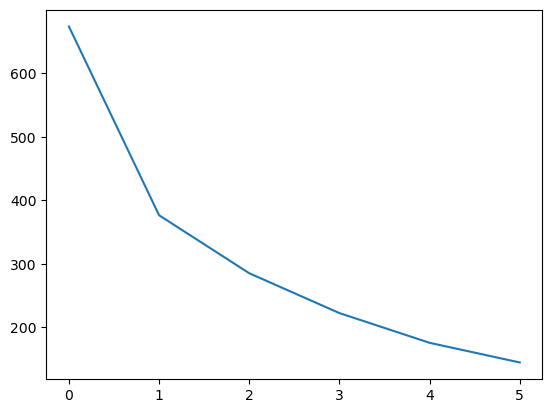

In [61]:
plt.plot(list_inertia)

In [62]:
clusters.cluster_centers_

array([[ 1.51879361,  2.36861987],
       [-0.63066548, -0.06561066],
       [ 1.40922504,  0.36886183]])

In [63]:
whole_data_df['cluster'] = clusters.labels_

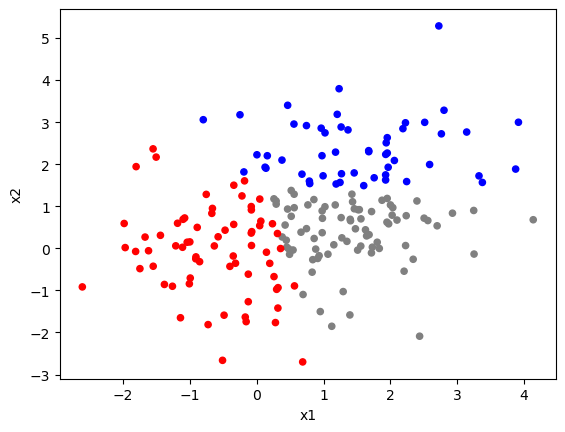

In [65]:
colors = {0:'blue', 1:'red', 2:'grey'}
color_list = [colors[group] for group in whole_data_df['cluster']]
ax = whole_data_df.plot.scatter('x1','x2', c=color_list)

In [74]:
whole_data_df[whole_data_df['labels']==1][['labels','cluster']].groupby('cluster').sum()

,labels
cluster,
0,2.0
1,12.0
2,6.0


In [79]:
positive_cluster = np.where(whole_data_df[whole_data_df['labels']==1][['labels','cluster']].groupby('cluster').sum().to_numpy() == np.max(whole_data_df[whole_data_df['labels']==1][['labels','cluster']].groupby('cluster').sum().to_numpy()))[0][0]

In [84]:
distances = np.zeros((3))
for i in range(3):
    distances[i] = np.linalg.norm(clusters.cluster_centers_[positive_cluster] - clusters.cluster_centers_[i])

In [85]:
negative_cluster = np.where(distances == np.max(distances))

In [87]:
cluster_labeled_init = np.ones((200))*99
for i in range(200):
    if whole_data_df.loc[i,'cluster'] == negative_cluster:
        cluster_labeled_init[i] = 0
    elif whole_data_df.loc[i,'labels'] == 1:
        cluster_labeled_init[i] = 1

In [88]:
whole_data_df['init_'] = cluster_labeled_init

In [91]:
whole_data_df.groupby('init_').count()

,x1,x2,labels,cluster
init_,,,,
0.0,52,52,52,52
1.0,18,18,18,18
99.0,130,130,130,130
